# Image Classification with Na ̈ıve Bayes and k-NN

# Load Dataset 

In [1]:
# Import Libraries
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Print the dataset size. 
print('Training Dataset Size:', train_images.shape[0])
print('Testing Dataset Size:', test_images.shape[0])

# Decorator
def draw_line(symbol='=', iterations=100): 
    print(symbol*iterations)

Training Dataset Size: 60000
Testing Dataset Size: 10000


# Part 1: Naive Bayes

### Data Preparation

In [2]:
# Flatten the images. 
train_images_flatten = train_images.reshape((60000, 28 * 28))
test_images_flatten = test_images.reshape((10000, 28 * 28))

### Algorithm Implementation

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import numpy as np

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

### Evaluate the model

Accuracy: 55.58%
Test Error: 44.42%
Execution Time: 2.27
Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



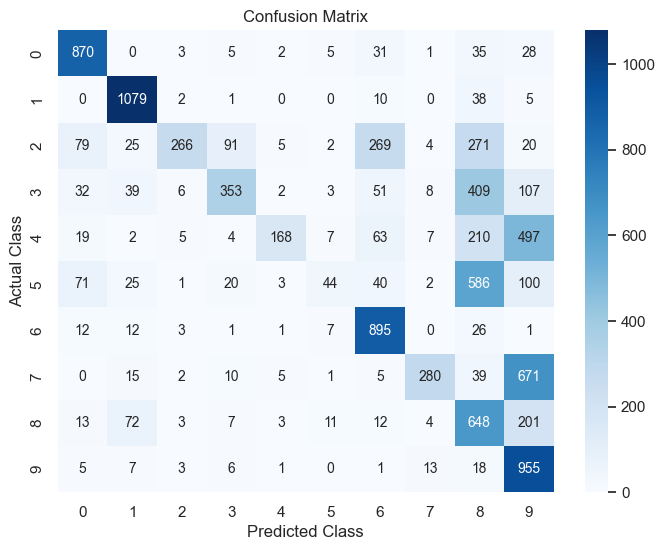

In [4]:
start_time = time.time()
# Train the model
gnb.fit(train_images_flatten, train_labels)

# Predict labels
predicted_labels = gnb.predict(test_images_flatten)

draw_line()
# Accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Error
# Calculate test error
test_error = 1 - accuracy
print(f"Test Error: {test_error * 100:.2f}%")

end_time = time.time()
execution_time = np.round(end_time - start_time,2) 

print('Execution Time:', execution_time) 
    
draw_line()
print('Classification Report:\n') 
print(classification_report(test_labels, predicted_labels))

draw_line()
# print('Confusion Matrix') 
# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
# Set a custom style for the plot
sns.set(style="whitegrid")
annot_kws = {"size": 10}
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10), annot_kws=annot_kws)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.savefig('naive_bayes_confusion_metrix.jpg')
plt.show()

### Mean and the Variance Plot for each category.

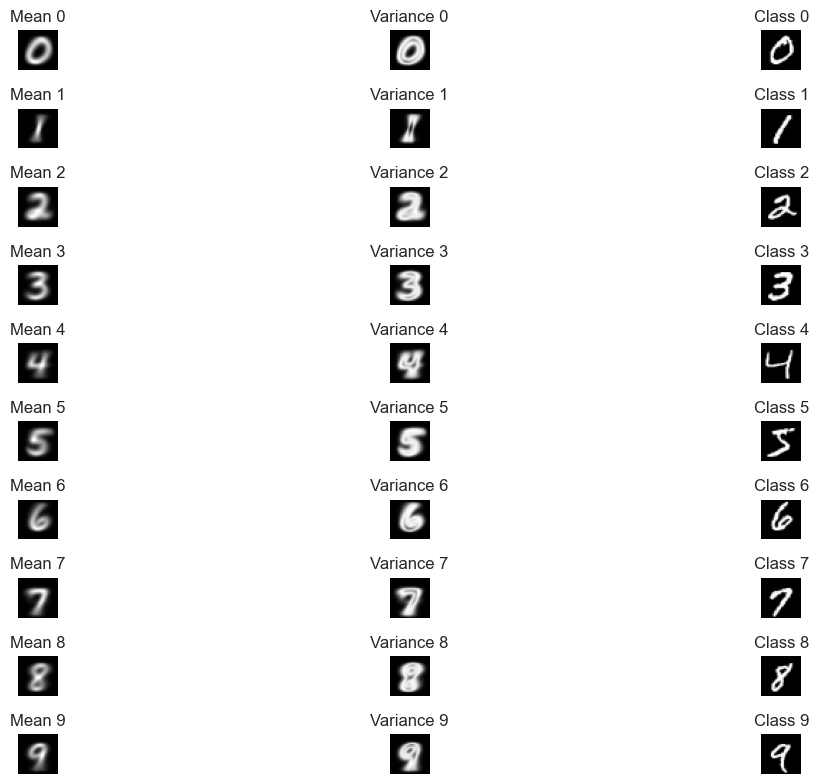

In [5]:
# Create a dictionary to store mean and variance images for each category (0-9)
category_images = {i: [] for i in range(10)}

# Calculate the mean and variance images for each category
for i in range(10):
    category_images[i] = train_images[train_labels == i]

# Plot mean and variance images for each category
plt.figure(figsize=(14, 8))
for i in range(10):
    plt.subplot(10, 3, i * 3 + 1)
    plt.imshow(category_images[i].mean(axis=0), cmap='gray')
    plt.title(f'Mean {i}', fontsize=12)
    plt.axis('off')
    
    plt.subplot(10, 3, i * 3 + 2)
    plt.imshow(category_images[i].var(axis=0), cmap='gray')
    plt.title(f'Variance {i}', fontsize=12)
    plt.axis('off')
    
    plt.subplot(10, 3, i * 3 + 3)
    plt.imshow(category_images[i][0], cmap='gray')
    plt.title(f'Class {i}', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.savefig('mean_variance_plot.jpg')
plt.show()


# Part 2: k-NN

### Data Preparation

In [6]:
import numpy as np 

print('Unique Values Before rescalling:') 
print(np.unique(train_images))

# Flatten the images and rescale pixel values to the range [0, 1]. As k-NN algorithm is based on distance. 
train_images_flatten_normalized = train_images.reshape((60000, 28 * 28)) / 255.0
test_images_flatten_normalized = test_images.reshape((10000, 28 * 28)) / 255.0

# train_images_flatten_normalized = train_images.reshape((60000, 28 * 28))
# test_images_flatten_normalized = test_images.reshape((10000, 28 * 28))

print('\n\nUnique Values After rescalling:') 
print(np.unique(train_images_flatten_normalized))

Unique Values Before rescalling:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 2

### Algorithm Implementation - k =3

In [7]:
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Train k-NN classifier
k = 3  # Set the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_images_flatten_normalized, train_labels)


KNeighborsClassifier(n_neighbors=3)

### Evaluate the model

Accuracy: 0.97
Test Error: 2.95%
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix


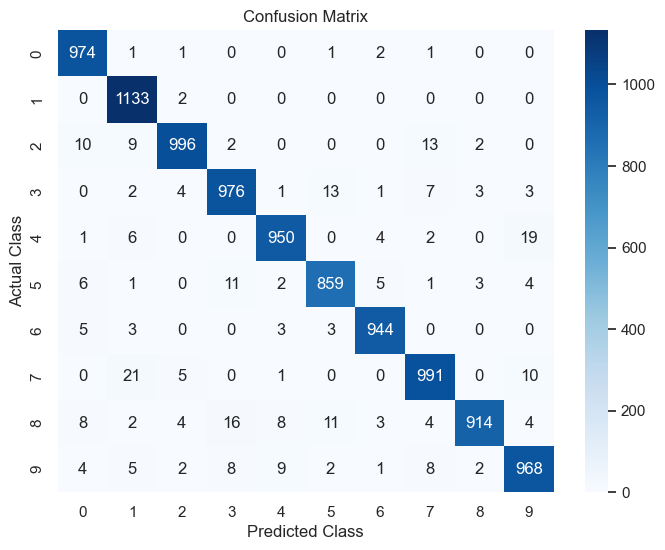

In [10]:
# Make predictions
predicted_labels = knn.predict(test_images_flatten_normalized)

draw_line()
# Evaluate the model
accuracy = accuracy_score(test_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2f}')

# Error
# Calculate test error
test_error = 1 - accuracy
print(f"Test Error: {test_error * 100:.2f}%")

draw_line()
print('Classification Report:\n') 
print(classification_report(test_labels, predicted_labels))

draw_line()
print('Confusion Matrix')
# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
# Set a custom style for the plot
sns.set(style="whitegrid")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

### Evaluate algorithm for k ∈ {1,2,5,10,100}

In [ ]:
import pandas as pd
import time

# List of k values to test
k_values = [1, 2, 5, 10, 100]

# Initialize lists to store accuracy, error, and execution time values
accuracy_values = []
error_values = []
execution_times = []

# Iterate over k values
for k in k_values:
    draw_line()
    print(f'\nEvaluating for k = {k}')
    start_time = time.time()
    
    # Create and train the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_images_flatten_normalized, train_labels)
    
    # Make predictions on the test set
    predictions = knn.predict(test_images_flatten_normalized)
    
    # Calculate accuracy and error
    accuracy = accuracy_score(test_labels, predictions)
    accuracy = np.round(accuracy*100, 2)
    
    error = 100 - accuracy
    error = np.round(error, 2)
    
    end_time = time.time()
    execution_time = np.round(end_time - start_time, 2) 
    
    # Append accuracy, error, and execution time to respective lists
    accuracy_values.append(accuracy)
    error_values.append(error)
    execution_times.append(execution_time)
    
    # Print accuracy and error. 
    print('Accuracy', accuracy)
    print('Error:', error)
    print('Exeuction Time in Seconds:', execution_time) 

# Create a dictionary for the analysis data
analysis_data = {
    'k-value': k_values,
    'error': error_values,
    'accuracy': accuracy_values,
    'execution_time (s)': execution_times
}

# Create a DataFrame from the analysis data
analysis_df = pd.DataFrame(analysis_data)

draw_line()
print('Result:\n') 
# Display the analysis DataFrame
display(analysis_df)



Evaluating for k = 1
Accuracy 96.91
Error: 3.09
Exeuction Time in Seconds: 19.83

Evaluating for k = 2
Accuracy 96.27
Error: 3.73
Exeuction Time in Seconds: 19.65

Evaluating for k = 5
Accuracy 96.88
Error: 3.12
Exeuction Time in Seconds: 20.37

Evaluating for k = 10
Accuracy 96.65
Error: 3.35
Exeuction Time in Seconds: 20.85

Evaluating for k = 100


### Visualize Error for different values of k

In [ ]:
# Create a figure for the error plot
plt.figure(figsize=(12, 3))

# Plot error values
plt.plot(k_values, error_values, marker='x', color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate(%)')
# plt.title('Error Vs k Values')
plt.xticks(k_values, rotation=45)
# plt.xticks(range(0, 111, 10))
# plt.xticks(k_values, rotation=45, ha="right")
# plt.xticks(k_values, rotation=45, ticks=k_values)

plt.grid(True)
plt.tight_layout()
plt.savefig('error_plot.jpg') 

plt.show()